In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170508288/170498071 [==============================] - 6s 0us/step


In [2]:
EPOCHS = 10
BATCH_SIZE = 16

In [3]:
input_shape = x_train[0].shape;

In [4]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=input_shape))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [5]:
model.compile(loss='binary_crossentropy',
			optimizer='rmsprop',
			metrics=['accuracy'])

# TODO: 
        Set up image preprocessing
        Implement model training
        Change this up for paper

In [6]:
#image preprocessing stuff
#will probably do all preprocessing manually
#datagen = ImageDataGenerator()
#datagen.fix(x_train)

history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 26s 9ms/step - loss: 0.2697 - accuracy: 0.3981 - val_loss: 0.2188 - val_accuracy: 0.5082
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2179 - accuracy: 0.5189 - val_loss: 0.1959 - val_accuracy: 0.5717
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2070 - accuracy: 0.5476 - val_loss: 0.2103 - val_accuracy: 0.5413
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.2049 - accuracy: 0.5571 - val_loss: 0.1819 - val_accuracy: 0.6201
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2066 - accuracy: 0.5607 - val_loss: 0.1987 - val_accuracy: 0.5670
Epoch 6/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.2076 - accuracy: 0.5554 - val_loss: 0.1968 - val_accuracy: 0.5685
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2106 - accuracy: 0.5466 - val_loss: 0.2016 - val_ac

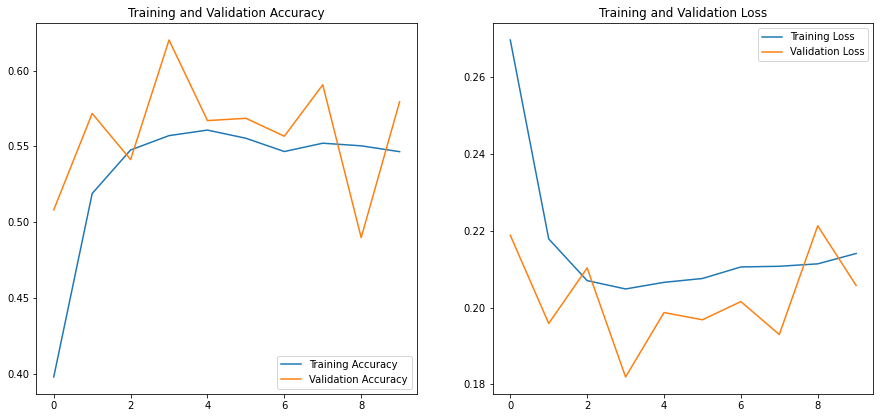

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()